In [90]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets , svm, tree
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_text

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.images[0] #---> 8x8 matrix array banta hai 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [7]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
print(digits.images[0:10])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0.  0.  2. 15. 11.

In [9]:
images= digits.images[0:10]

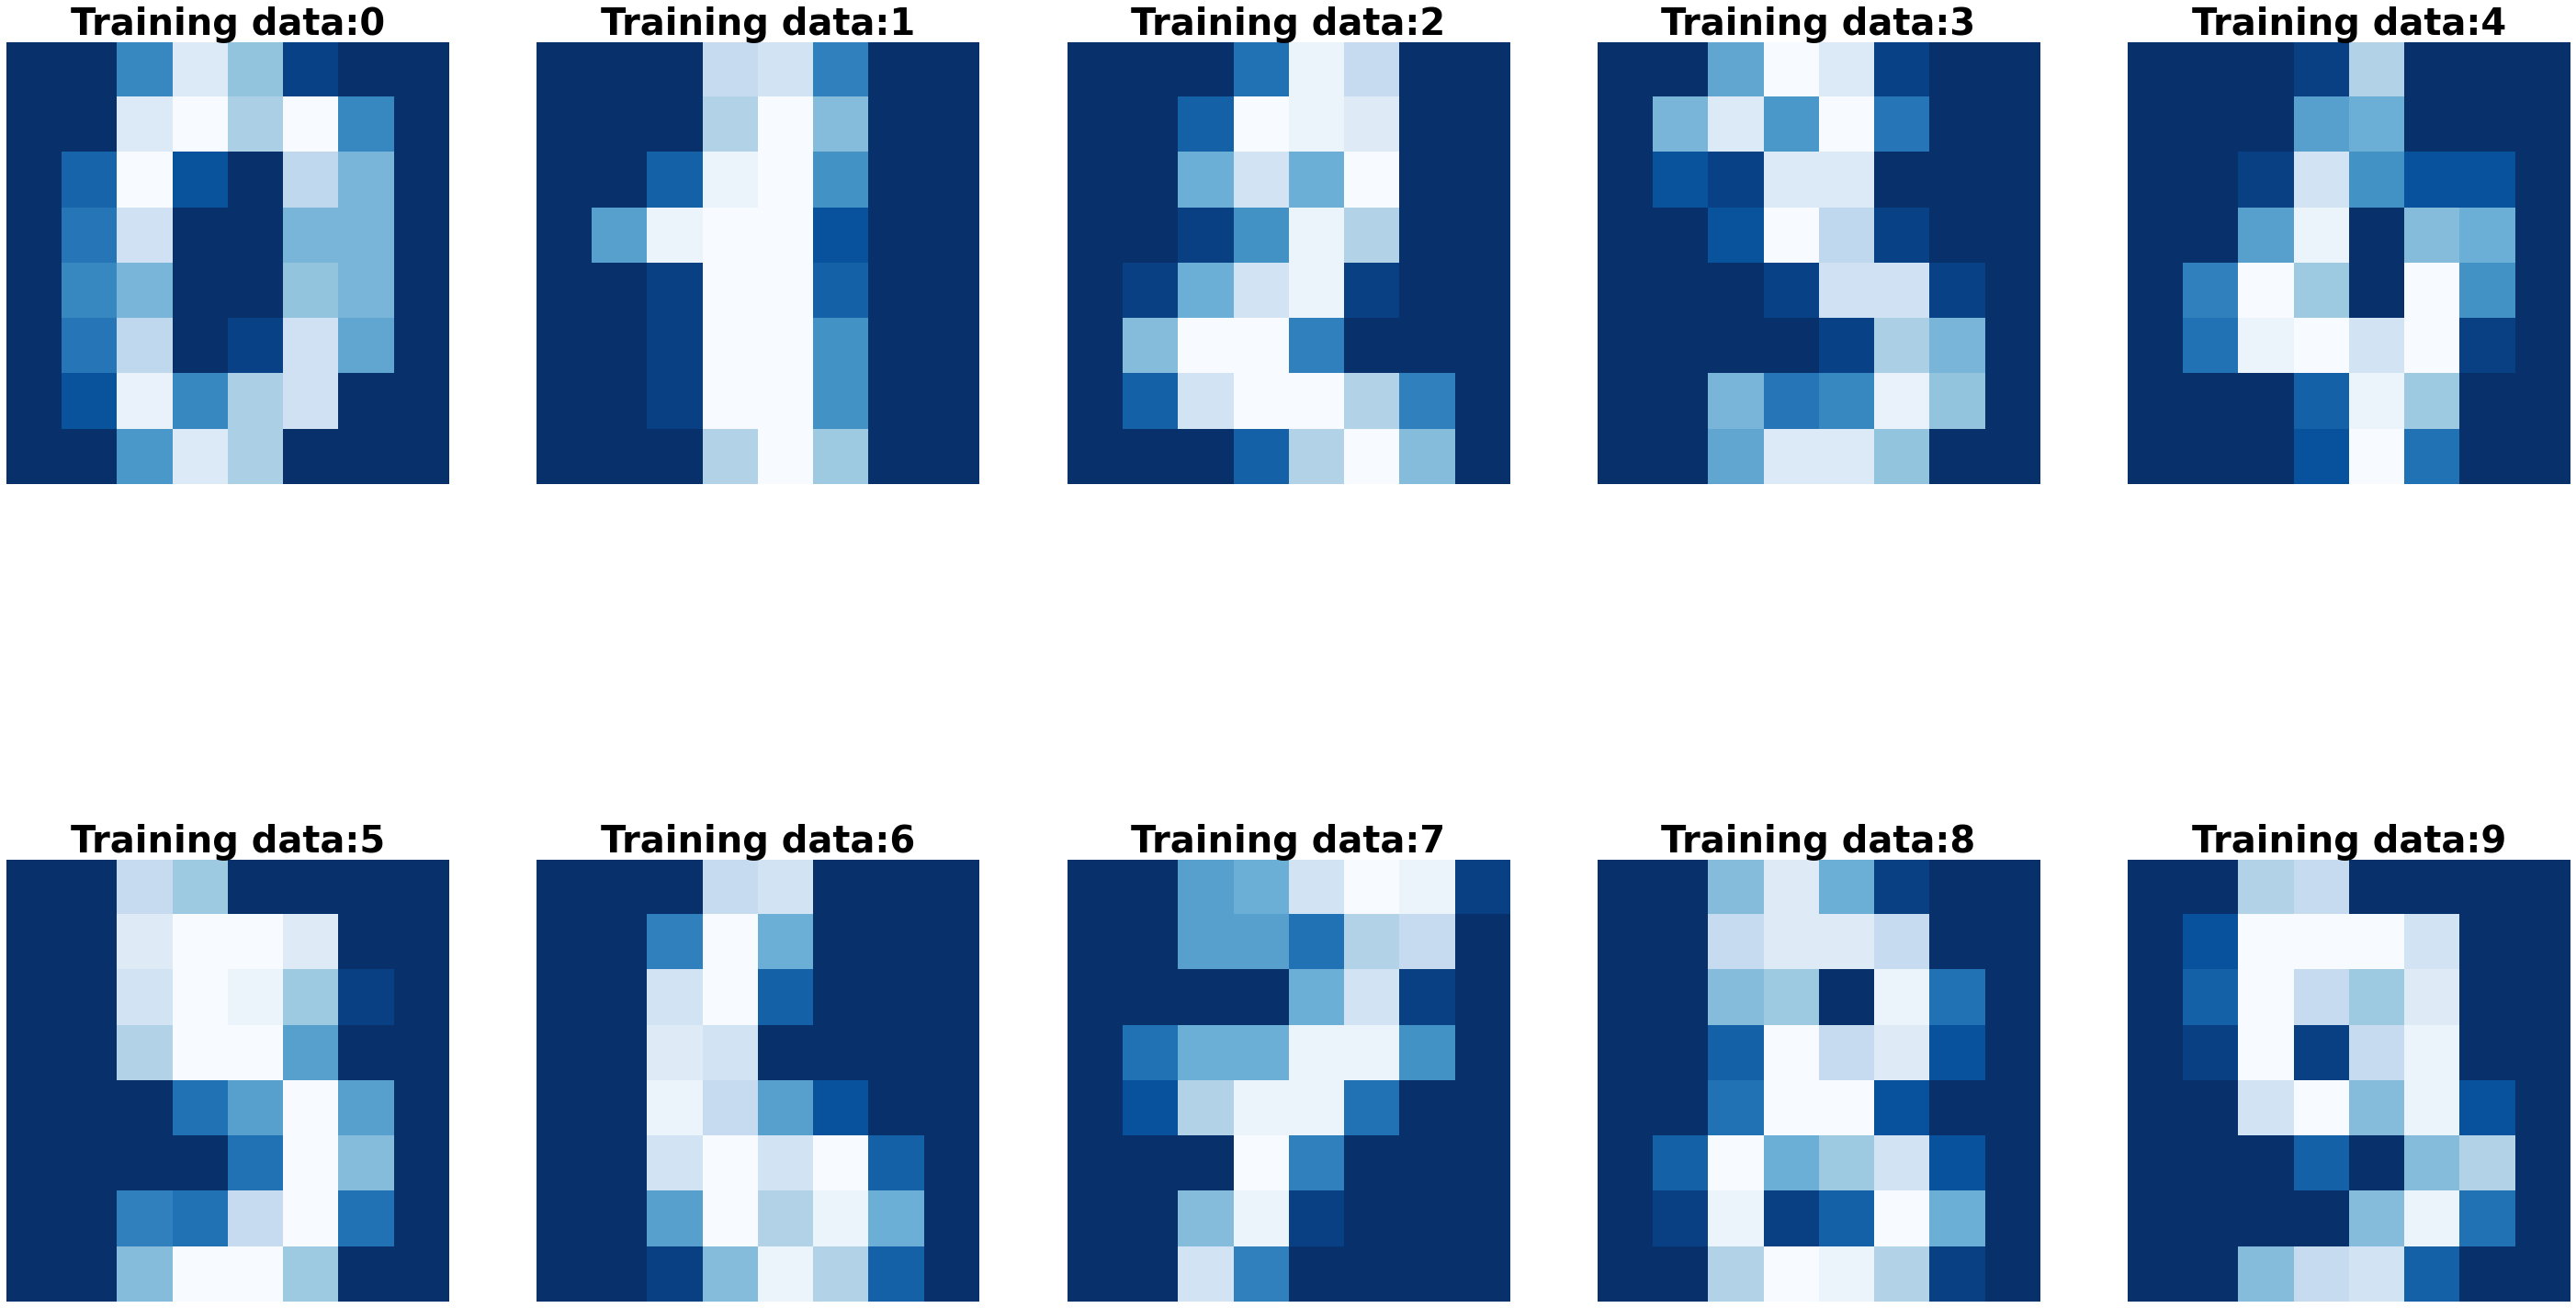

In [77]:
fig, ax =plt.subplots(nrows=2, ncols =5, figsize=(50,30))
index=0
for i in range(2):
    for j in range(5):
        ax[i,j].set_axis_off()
        ax[i,j].imshow(images[index], cmap=plt.cm.Blues_r, interpolation="nearest")
        ax[i,j].set_title("Training data:{}".format(digits.target[index]), fontsize=40,fontweight="bold")
        index+=1

In [20]:
# so the above thing shows the data from starting 10 images which has the handwritten objects.

In [38]:
X= digits.images.reshape((len(digits.images), -1))
y=digits.target
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=True )
print("This is all the splitting data:")
print("------------------------------------------")
print("------------------------------------------")
print("Training Data:", x_train[0:5])
print("-------------------------------------------")
print("Training target data:", y_train[0:5])
print("-------------------------------------------")
print("Testing data: ", x_test[0:5])
print("--------------------------------------------")
print("Testing target data:", y_test[0:5])

This is all the splitting data:
------------------------------------------
------------------------------------------
Training Data: [[ 0.  0.  2. 10. 16. 11.  1.  0.  0.  0. 13. 13. 10. 16.  8.  0.  0.  4.
  14.  1.  8. 14.  1.  0.  0.  4. 15. 12. 15.  8.  0.  0.  0.  0.  6.  7.
  14.  5.  0.  0.  0.  1.  2.  0. 12.  5.  0.  0.  0.  8. 15.  6. 13.  4.
   0.  0.  0.  0.  5. 11. 16.  3.  0.  0.]
 [ 0.  0.  3. 12.  3.  0.  0.  0.  0.  0. 13. 14.  2.  0.  0.  0.  0.  3.
  10.  0.  0.  0.  0.  0.  0.  0.  0.  3.  5.  3.  0.  0.  0.  4. 10. 16.
  16. 16.  4.  0.  0.  6. 16.  4.  0.  8.  9.  0.  0.  0. 15. 12.  4.  9.
  12.  0.  0.  0.  2. 13. 16. 14.  4.  0.]
 [ 0.  0.  6. 16. 16.  8.  0.  0.  0.  2. 16.  8.  9. 16.  3.  0.  0.  8.
  16.  1.  0.  9.  9.  0.  0.  9. 12.  0.  0.  8. 12.  0.  0. 10. 12.  0.
   0.  8. 10.  0.  0.  8. 13.  0.  0.  9.  8.  0.  0.  2. 16.  8.  6. 15.
   3.  0.  0.  0.  8. 16. 15.  8.  0.  0.]
 [ 0.  0. 10. 13.  9.  1.  0.  0.  0.  2. 16.  7. 10.  8.  0.  0.  0.  0

In [46]:
# shall we call the data our algorithm so that we can start  Recognize.
svc = svm.SVC(gamma= 0.001, C=0.1)

In [47]:
svc.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001)

In [50]:
# now shall we predict our model:
y_pred=svc.predict(x_test)

In [49]:
# so Lets now find out the accuracy score , classification Report and confusion matrix
# how  did our model has done the job.

In [52]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.96      0.98      0.97        49
           2       0.98      0.96      0.97        49
           3       1.00      0.88      0.93        64
           4       0.98      1.00      0.99        61
           5       0.92      0.98      0.95        47
           6       1.00      1.00      1.00        51
           7       0.90      1.00      0.95        57
           8       0.91      0.93      0.92        46
           9       0.96      0.93      0.95        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [53]:
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix :
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 48  0  0  0  1  0  0  0  0]
 [ 0  0 47  0  0  0  0  1  1  0]
 [ 0  0  1 56  0  1  0  2  3  1]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0  2  0  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  3  0 53]]


In [54]:
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))

Accuracy Score:
0.9629629629629629


In [55]:
# so by this svm(Support Vector Machine)  we have got the accuracy of 96%

In [57]:
# Now lets see the performance by the Logistic Regression
lr=LogisticRegression()

In [58]:
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred_log=lr.predict(x_test)

In [60]:
print(y_pred_log)

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 1 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 3 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 2 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 8 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 4 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 3 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 2 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 1 0 2 6 9 3 

In [61]:
print("Classification report:")
print(classification_report(y_test, y_pred_log))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.94      0.98      0.96        49
           2       0.94      1.00      0.97        49
           3       0.97      0.95      0.96        64
           4       0.97      0.98      0.98        61
           5       0.96      0.91      0.93        47
           6       1.00      1.00      1.00        51
           7       0.98      0.95      0.96        57
           8       0.96      0.96      0.96        46
           9       0.96      0.95      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [62]:
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_log))

Accuracy Score:
0.9685185185185186


In [63]:
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred_log))

Confusion Matrix :
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 61  0  0  0  1  1  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 54  0  1]
 [ 0  0  1  0  0  1  0  0 44  0]
 [ 0  1  0  0  0  1  0  0  1 54]]


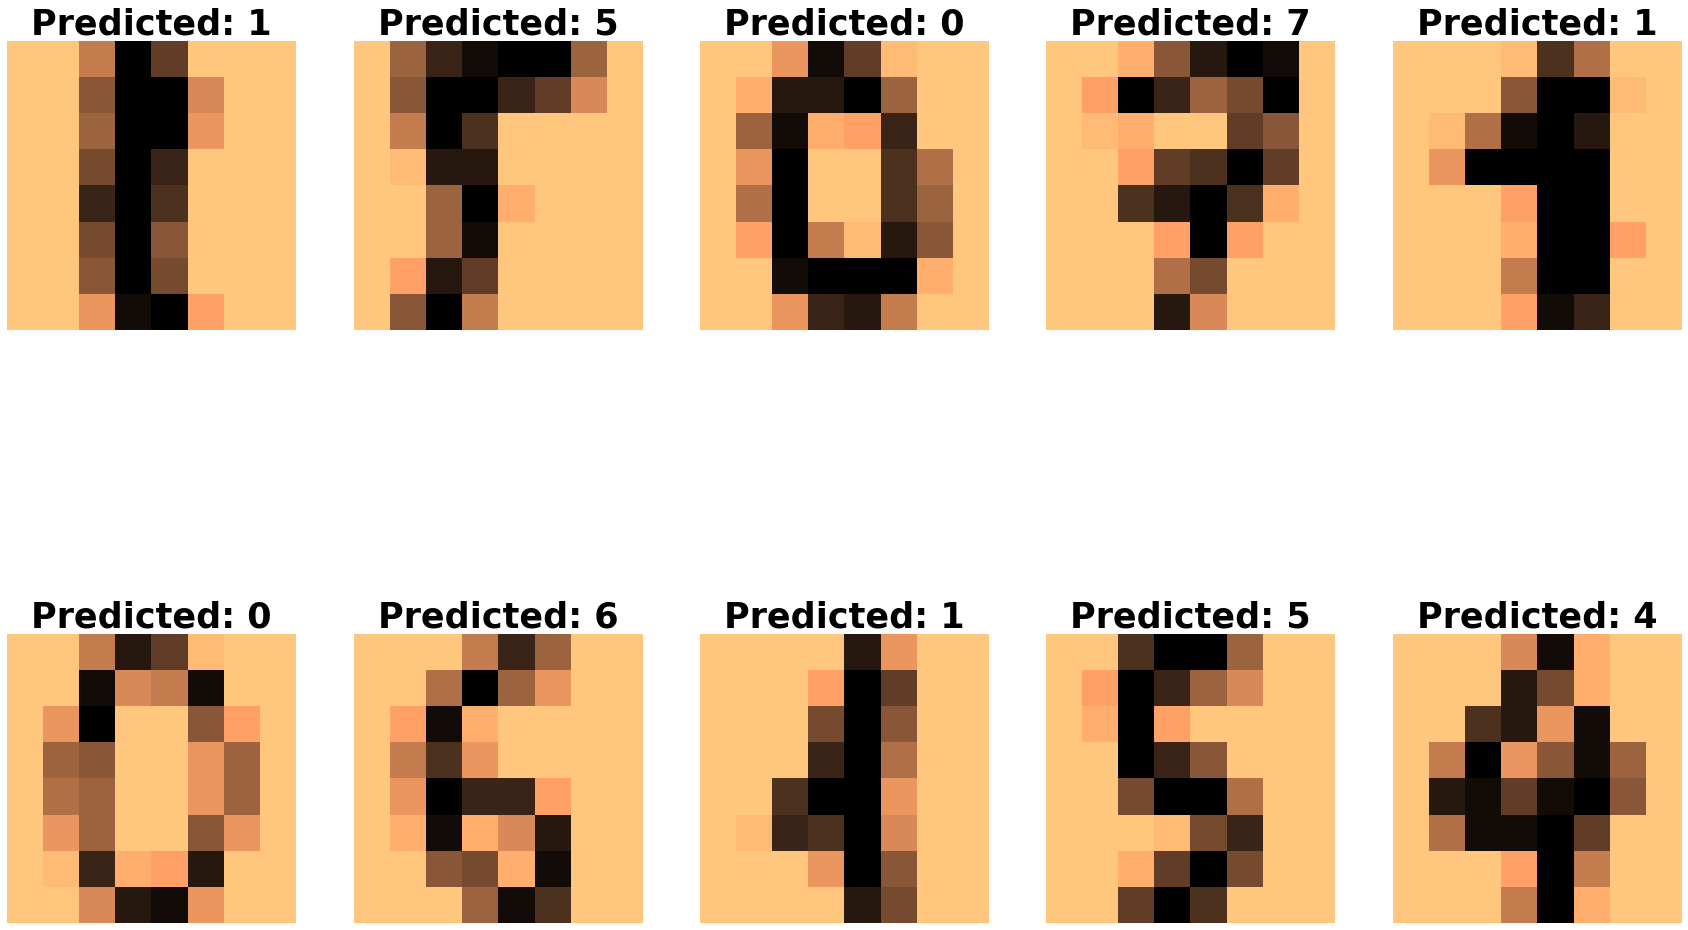

In [78]:

# this plot is by the prediction of logistic Regression
fig, ax = plt.subplots( nrows=2, ncols=5, figsize=(30,20))
img_index=0
for i  in range(2):
    for j in range(5):
        ax[i,j].set_axis_off()
        image=x_test[img_index].reshape(8,8)
        ax[i,j].set_title("Predicted: {}".format(y_pred_log[img_index]), fontsize=35, fontweight= 'bold')
        ax[i,j].imshow(image,cmap=plt.cm.copper_r ,interpolation="nearest")
        img_index+=1  

In [80]:
!pip install graphviz

In [88]:
#lets see the performance of the Decision Tree Regressor.
tree1= DecisionTreeClassifier()
tree1.fit(x_train, y_train)
y_pred_tree= tree1.predict(x_test)


# lets see the classification Report , confusion matrix and acurracy score.
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("--------------------------------------------------------")

# Confusion matrix 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("--------------------------------------------------------")

# Acuraacy score
print("Acurracy Score:")
print(accuracy_score(x_test, y_pred_tree))


# so by this  we  understood that Decision Tree Classifier is not the best algorithm so this can gives us the best performance.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.88      0.94      0.91        49
           2       0.86      0.88      0.87        49
           3       0.93      0.80      0.86        64
           4       0.89      0.90      0.89        61
           5       0.78      0.91      0.84        47
           6       1.00      0.88      0.94        51
           7       0.89      0.89      0.89        57
           8       0.71      0.80      0.76        46
           9       0.74      0.75      0.75        57

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540

--------------------------------------------------------
Confusion Matrix:
[[54  0  1  0  1  1  0  0  2  0]
 [ 0 46  1  0  1  0  0  1  0  0]
 [ 0  0 43  1  0  0  0  0  5  0]
 [ 0  1  0 51  0  0  0  2  3  7]
 [ 0  1  2 

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets